## Requirements

pip install ipykernel numpy tensorflow scikit-learn



## Load input data

In [196]:
# Load in input data (DIY)
import numpy as np

def read_input_data(file_path):
    temp_list = []
    with open(file_path) as f:
        lines=f.readlines()
        for line in lines:
            line = line.split()
            if line:            
                line = [float(numbers) for numbers in line]
                temp_list.append(line)
    return np.array(temp_list)

method_A = read_input_data(r'data_source\test_data.txt')

# ------------------------------------------------------------

# Load in input data (Easier way)        
method_B = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)


print((method_A==method_B).all())   
print(method_A.shape)
print(method_B.shape)

True
(100, 2)
(100, 2)


In [197]:
test_data = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)
training_data = np.loadtxt(r'data_source\training_data.txt', delimiter=' ', dtype=float)
validation_data = np.loadtxt(r'data_source\validation_data.txt', delimiter=' ', dtype=float)

## Examine data

Offset added for better visibility

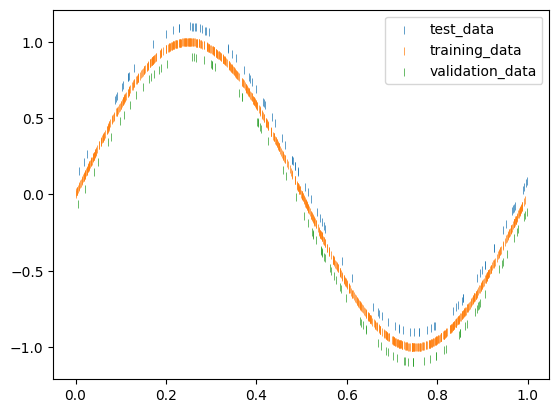

In [198]:

import matplotlib.pyplot as plt

plt.scatter(x = test_data[:,0] ,  y = test_data[:,1] + 0.1   ,marker="|" , label = "test_data"  , linewidths=0.5)
plt.scatter(x = training_data[:,0] ,  y = training_data[:,1] ,  marker="|" , label = "training_data" , linewidths=0.5 )
plt.scatter(x = validation_data[:,0] ,  y = validation_data[:,1] - 0.1 ,  marker="|" , label = "validation_data" , linewidths=0.5)
plt.legend()

## Regression problem

- No activation at the end
- MSE for loss function (typically for regression)
- Optimizer Rmsprop/Adagrad
- Custom metric implemented (mean_absolute_error_percentage)
- Model summary for debugging and deeper understanding


### Model definition

In [293]:
from keras import models
from keras import layers
import tensorflow as tf

def summary(model: tf.keras.Model) -> str:
  summary = []
  model.summary(print_fn=lambda x: summary.append(x))
  return '\n'.join(summary)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  

#https://github.com/bnsreenu/python_for_microscopists/blob/master/tips_tricks_37_Understanding%20MAE%20and%20MSE.py
#https://stackoverflow.com/questions/52357542/attributeerror-tensor-object-has-no-attribute-numpy

 
X_train = training_data[:,0]
Y_train = training_data[:,1]
X_val = validation_data[:,0]
Y_val = validation_data[:,1]


model.summary()


[1.34364244e-01 8.47433737e-01 7.63774619e-01 2.55069026e-01
 4.95435087e-01 4.49491065e-01 6.51592973e-01 7.88723351e-01
 9.38595868e-02 2.83474765e-02 8.35765104e-01 4.32767068e-01
 7.62280082e-01 2.10605335e-03 4.45387194e-01 7.21540032e-01
 2.28762221e-01 9.45270696e-01 9.01427458e-01 3.05899830e-02
 2.54458610e-02 5.41412473e-01 9.39149163e-01 3.81204238e-01
 2.16599397e-01 4.22116576e-01 2.90407876e-02 2.21691666e-01
 4.37887594e-01 4.95812241e-01 2.33084450e-01 2.30866542e-01
 2.18781037e-01 4.59603466e-01 2.89781615e-01 2.14897053e-02
 8.37577976e-01 5.56454323e-01 6.42294363e-01 1.85906266e-01
 9.92543412e-01 8.59946529e-01 1.20889960e-01 3.32695185e-01
 7.21484408e-01 7.11191770e-01 9.36440587e-01 4.22107000e-01
 8.30035693e-01 6.70305566e-01 3.03368511e-01 5.87580606e-01
 8.82479001e-01 8.46197418e-01 5.05283821e-01 5.89002258e-01
 3.45258302e-02 2.42739974e-01 7.97404248e-01 4.14313999e-01
 1.73007402e-01 5.48798761e-01 7.03040762e-01 6.74485831e-01
 3.74703021e-01 4.389616

In [200]:
test_data[ : , 1 ]

array([-0.59413172, -0.45307409, -0.82230611,  0.66874362,  0.22203742,
       -0.95868727,  0.71754437, -0.99999201,  0.11647421,  0.85577203,
        0.27205548,  0.66839621,  0.79208906,  0.50798952,  0.11387754,
        0.88250991,  0.99793372, -0.77891948, -0.53358159,  0.97288834,
       -0.0142831 ,  0.9987619 , -0.08652634, -0.99783273, -0.93279885,
        0.40576434, -0.98564704,  0.08913979, -0.97655003,  0.05415628,
       -0.17814815, -0.97750719,  0.54311298,  0.72668553, -0.20884497,
        0.9914954 ,  0.16348055,  0.99979487,  0.12666053, -0.29603011,
        0.59219933, -0.98617595, -0.86277403,  0.53137383, -0.64653821,
       -0.02648457, -0.30660164, -0.21499142,  0.82102055, -0.332195  ,
       -0.18985417,  0.6037806 , -0.32590131,  0.48379382, -0.88124256,
        0.6783237 ,  0.9953621 ,  0.98372481,  0.12712246, -0.96324784,
       -0.77906334, -0.97392646, -0.896103  ,  0.52085161,  0.63879271,
       -0.87234744,  0.96160156, -0.04910468, -0.56167609,  0.66

### Callbacks (not done yet)

In [201]:
# NOT DONE YET

"""""

class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self._data = []

    def on_epoch_end(self, batch, logs={}):
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = np.asarray(model.predict(X_val))

        y_val = np.argmax(y_val, axis=1)
        y_predict = np.argmax(y_predict, axis=1)

        self._data.append({
            'val_rocauc': roc_auc_score(y_val, y_predict),
        })
        return

    def get_data(self):
        return self._data

metrics = Metrics()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[metrics])
metrics.get_data()

"""


'""\n\nclass Metrics(keras.callbacks.Callback):\n    def on_train_begin(self, logs={}):\n        self._data = []\n\n    def on_epoch_end(self, batch, logs={}):\n        X_val, y_val = self.validation_data[0], self.validation_data[1]\n        y_predict = np.asarray(model.predict(X_val))\n\n        y_val = np.argmax(y_val, axis=1)\n        y_predict = np.argmax(y_predict, axis=1)\n\n        self._data.append({\n            \'val_rocauc\': roc_auc_score(y_val, y_predict),\n        })\n        return\n\n    def get_data(self):\n        return self._data\n\nmetrics = Metrics()\nhistory = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[metrics])\nmetrics.get_data()\n\n'

### Custom metric funtion implementation

In [202]:
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_percentage_error

def percentage_metric(y_true, y_pred):
        result = (100. * np.mean(np.abs((y_true - y_pred) / y_true), axis=-1)) 
        
        #First value of all batch during the traning, can be observed during traning
        
        #print(f"Current true value:  {y_true[0].numpy()}  -- Current predicted value:  {y_pred[0].numpy()} \n")
        
        return result



### Setting up plots for monitoring the learning

In [262]:

import matplotlib.gridspec as gridspec
from textwrap import wrap

def training_plot(history , epoch , batch_size, model_summary = ""):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["mean_absolute_error"]
    val_acc = history.history["val_mean_absolute_error"]
    custom_perc = history.history['percentage_metric']
    val_custom_perc = history.history['val_percentage_metric']


    # Original solution
    #fig , [[loss_plot , acc_plot] , [custom_plot , placeholder]] = plt.subplots(2,2) 
    
    #https://stackoverflow.com/questions/37360568/python-organisation-of-3-subplots-with-matplotlib
    
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure()
    
    loss_plot = plt.subplot(gs[1, :]) 
    acc_plot = plt.subplot(gs[0, 0]) 
    custom_plot = plt.subplot(gs[0, 1]) 
    
    fig.set_figwidth(10)
    fig.set_figheight(7)

    
    loss_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs
    acc_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs

    loss_plot.plot(range(1, len(loss) + 1), loss ,label = "Traning Loss", marker = "o")
    loss_plot.plot(range(1, len(loss) + 1), val_loss, label = "Validation Loss" , marker = "o")
    loss_plot.set_xlabel("Epochs")
    loss_plot.set_ylabel("MSE")
    loss_plot.legend()


    acc_plot.plot(range(1, len(acc) + 1), acc ,label = "Traning MAE", marker = "o")
    acc_plot.plot(range(1, len(acc) + 1), val_acc, label = "Validation MAE" , marker = "o")
    acc_plot.set_xlabel("Epochs")
    acc_plot.set_ylabel("MAE")
    acc_plot.legend()

    custom_plot.plot(range(1, len(acc) + 1), custom_perc ,label = "Percentage Accuracy", marker = "o")
    custom_plot.plot(range(1, len(acc) + 1), val_custom_perc, label = "Validation Percentage Accuracy" , marker = "o")
    custom_plot.set_xlabel("Epochs")
    custom_plot.set_ylabel("Percentage Accuracy")
    custom_plot.legend()


    text = fig.text(0.50, -0.62, f'Epochs: {epoch} , Batch size: {batch_size} \n\n\n\n {model_summary}', horizontalalignment='center',  wrap=False ) 

    fig.tight_layout(rect=(0,.05,1,1)) 
    plt.show()

    


### Performing the initial learning

In [204]:

epoch = 5
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=1)

Epoch 1/5
80/80 [==============================] - 3s 39ms/step - loss: 0.3958 - mean_absolute_error: 0.5509 - percentage_metric: 122.5029 - val_loss: 0.2706 - val_mean_absolute_error: 0.4451 - val_percentage_metric: 153.3250
Epoch 2/5
80/80 [==============================] - 3s 37ms/step - loss: 0.2384 - mean_absolute_error: 0.4251 - percentage_metric: 103.2413 - val_loss: 0.1775 - val_mean_absolute_error: 0.3611 - val_percentage_metric: 194.9300
Epoch 3/5
80/80 [==============================] - 3s 38ms/step - loss: 0.1523 - mean_absolute_error: 0.3450 - percentage_metric: 127.0004 - val_loss: 0.1450 - val_mean_absolute_error: 0.3270 - val_percentage_metric: 209.5959
Epoch 4/5
80/80 [==============================] - 3s 39ms/step - loss: 0.1265 - mean_absolute_error: 0.3064 - percentage_metric: 128.9780 - val_loss: 0.1386 - val_mean_absolute_error: 0.3095 - val_percentage_metric: 219.1954
Epoch 5/5
80/80 [==============================] - 3s 38ms/step - loss: 0.1164 - mean_absolute_e

#### Content of the history varible

In [205]:
history.history


{'loss': [0.39583244919776917,
  0.23839977383613586,
  0.15227137506008148,
  0.12650348246097565,
  0.11637695133686066],
 'mean_absolute_error': [0.5508769750595093,
  0.4250906705856323,
  0.34504956007003784,
  0.30643102526664734,
  0.2845853865146637],
 'percentage_metric': [122.50285339355469,
  103.24131774902344,
  127.00035095214844,
  128.9779815673828,
  133.04827880859375],
 'val_loss': [0.27057933807373047,
  0.1775277853012085,
  0.14495040476322174,
  0.13861006498336792,
  0.13290172815322876],
 'val_mean_absolute_error': [0.4450863301753998,
  0.3611278831958771,
  0.3270137906074524,
  0.3095325827598572,
  0.30173981189727783],
 'val_percentage_metric': [153.3249969482422,
  194.92996215820312,
  209.59593200683594,
  219.19540405273438,
  211.89866638183594]}

### Showing the initial results

- Percenage Accuracy may not be the best metric
- Maybe overfitting after 4. epoch

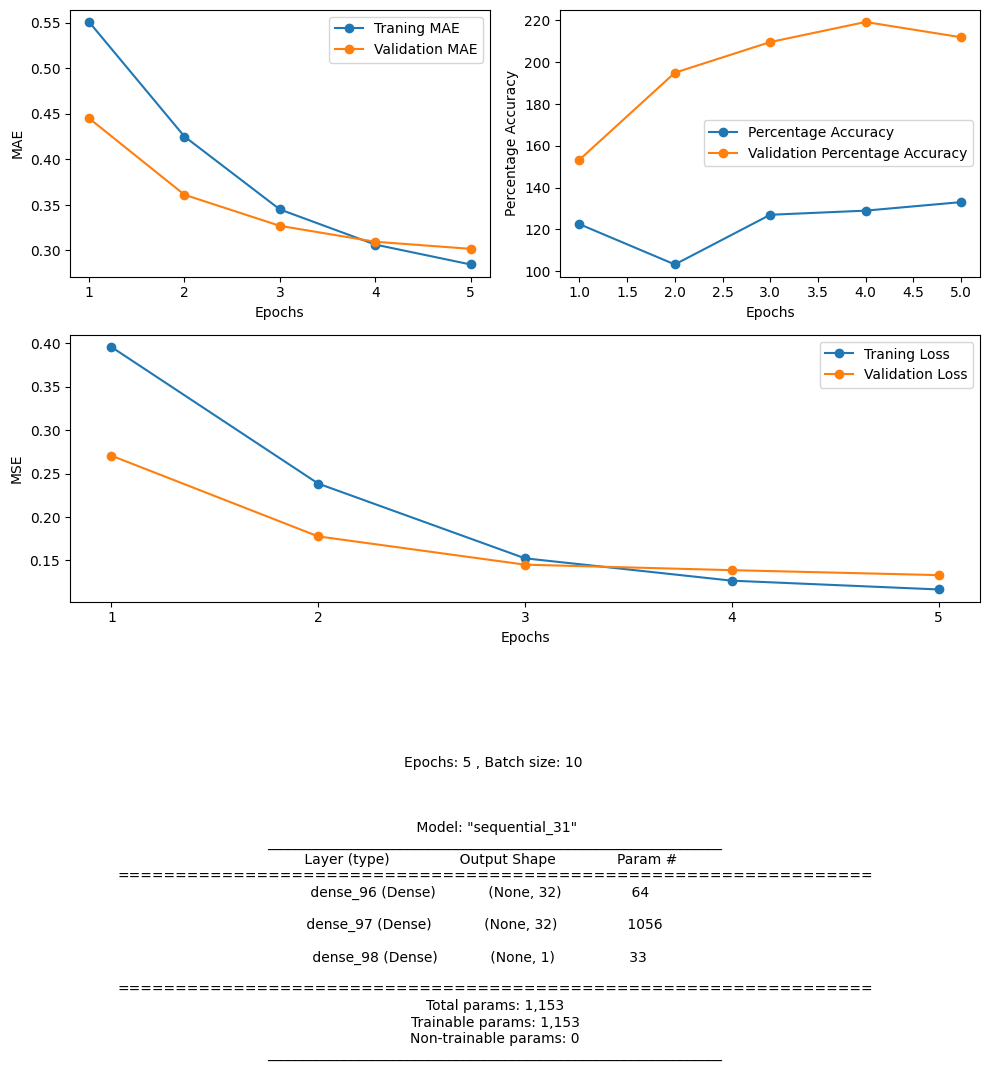

In [206]:
training_plot(history , epoch, batch_size, summary(model))

## Finetuning the model

### Error is still high, train it longer

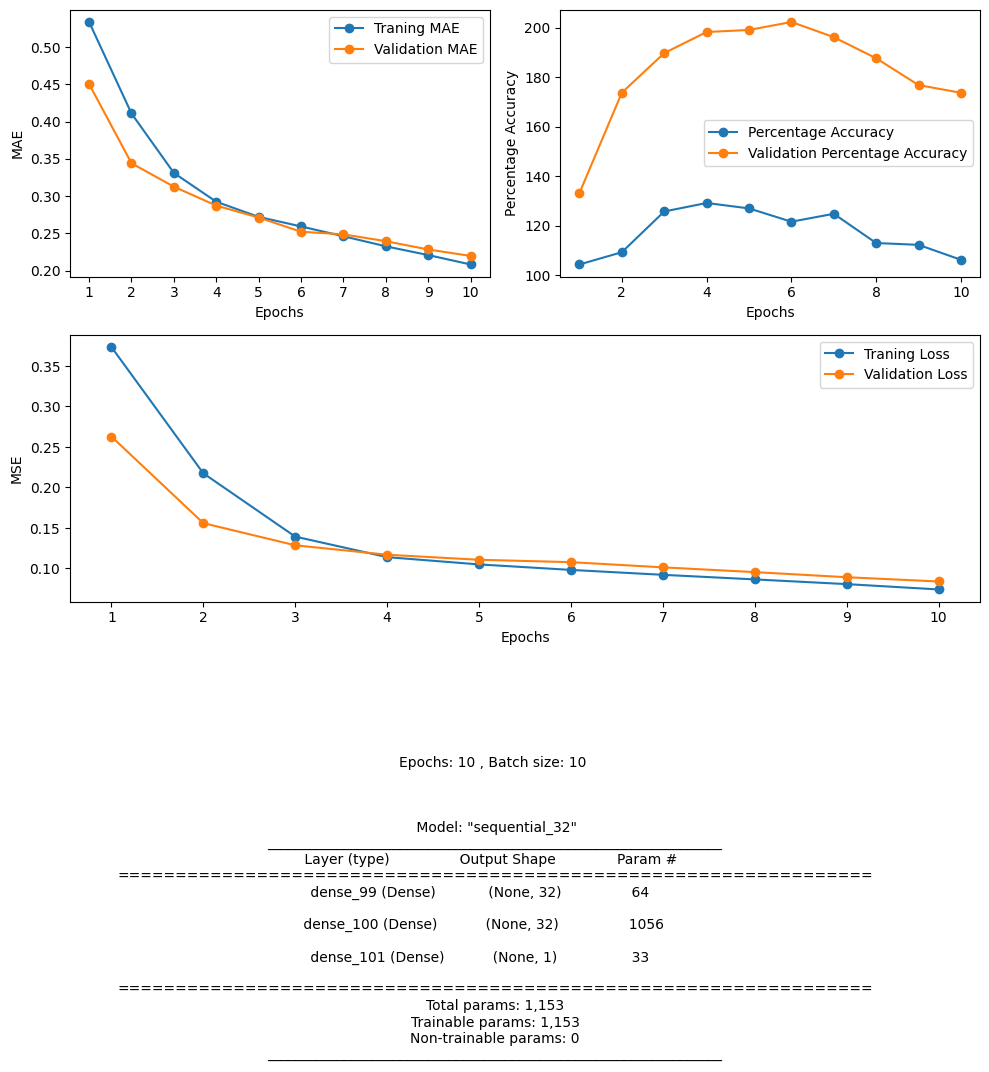

In [207]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Result getting better but learning is slow, increase the network size

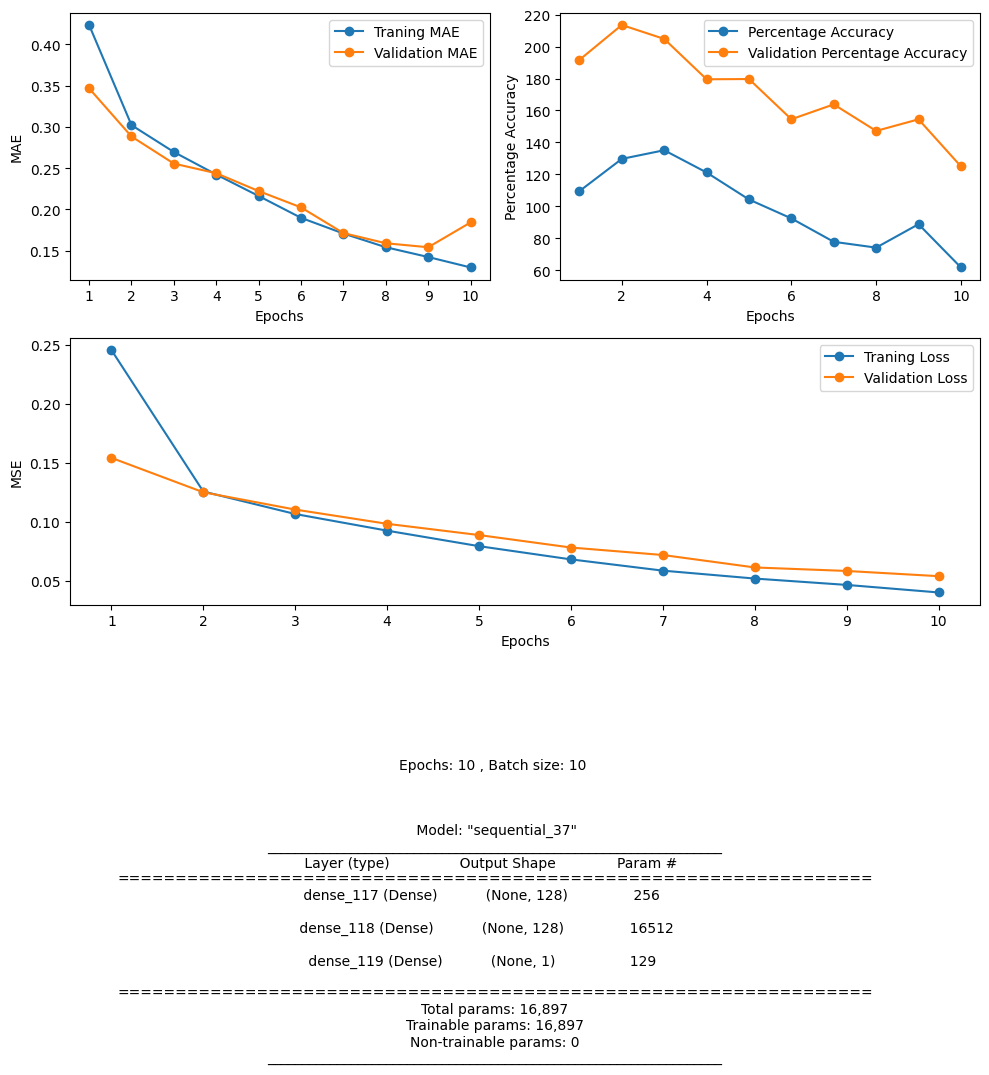

In [220]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Experiment with smaller batch size

- Interestingly it did not improve the model that much but the run time almost doubled

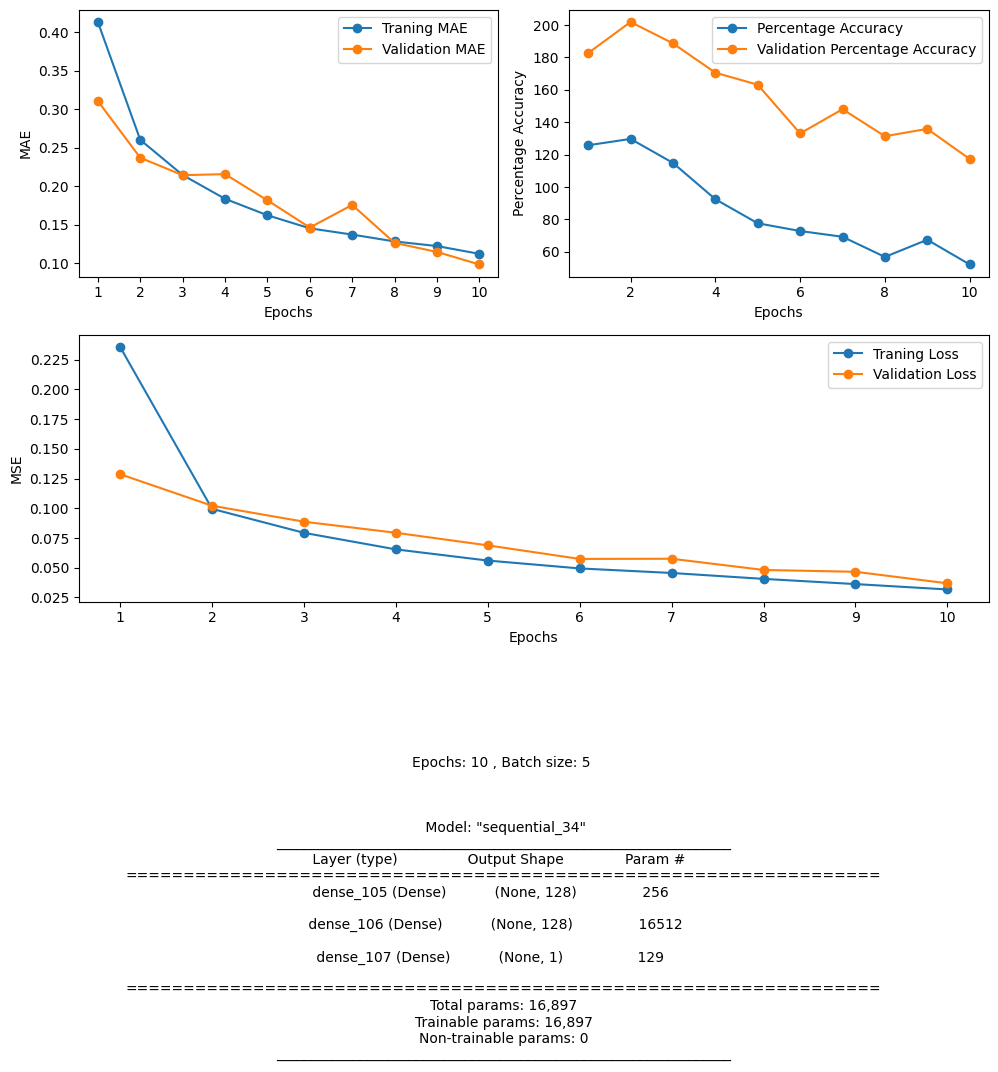

In [209]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 5

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Instead of batch size, modify the network - better results with a deeper network

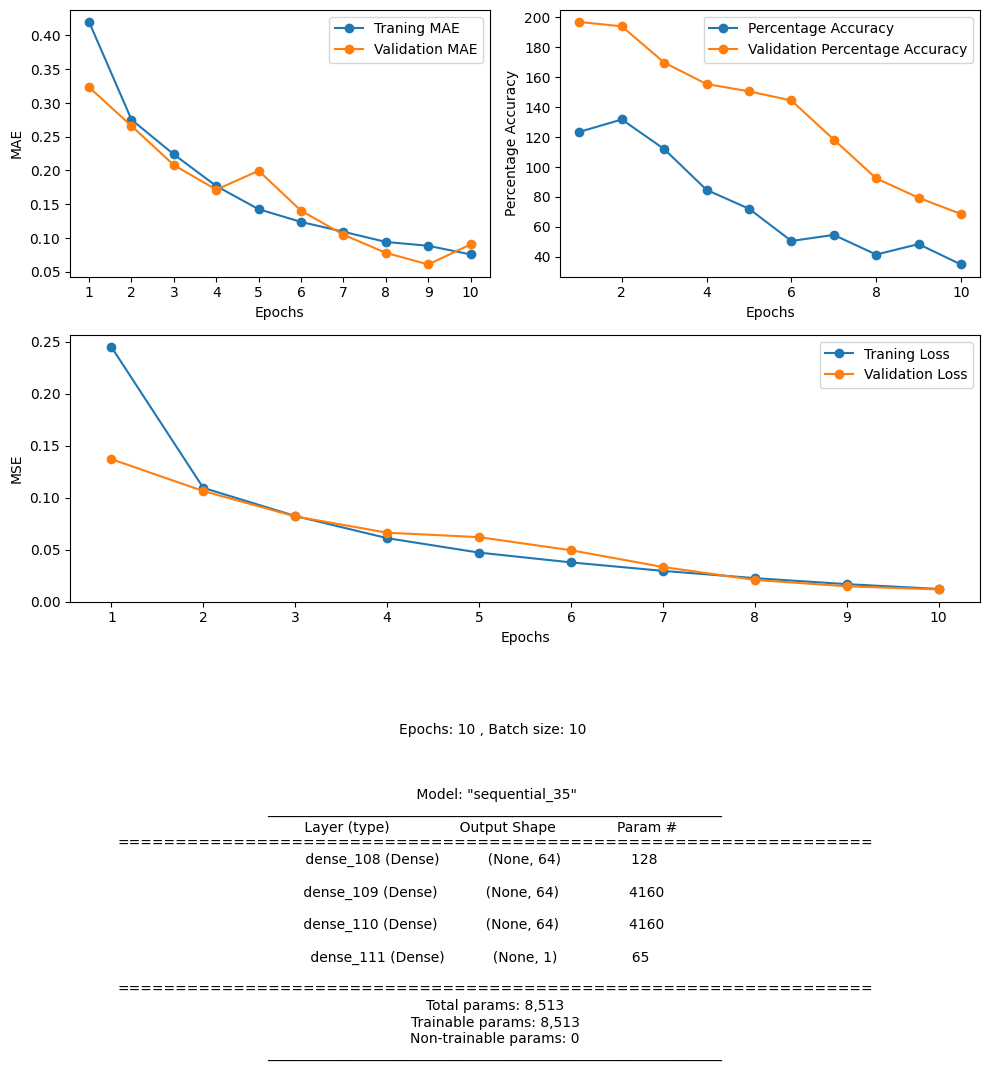

In [210]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Decreasing the widht of the model and inceasing the depth


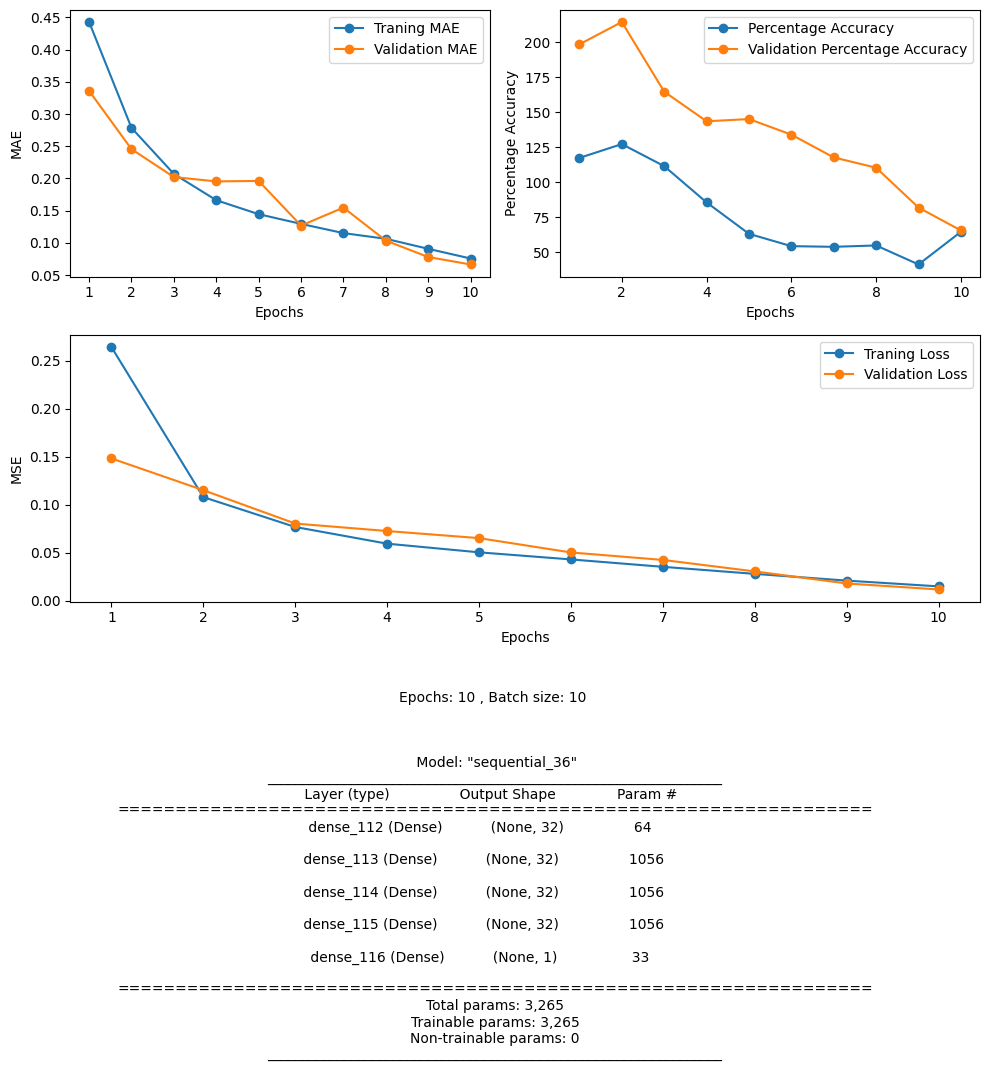

In [211]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Changing Loss function for smaller errors



In [274]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

KeyboardInterrupt: 

### Using dirty tricks from the book - Regularization

(https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization)

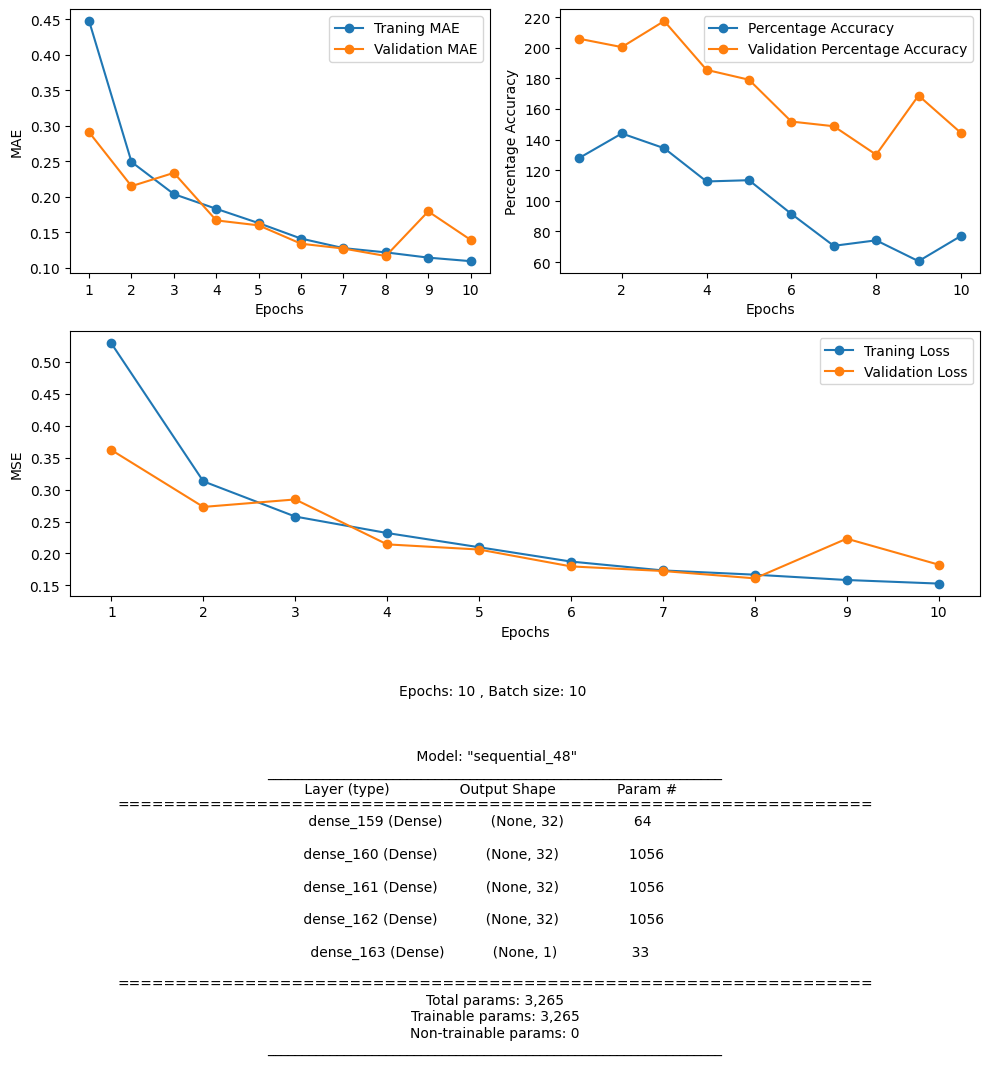

In [243]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001), input_shape = (1,)))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Using dirty tricks from the book - Dropout

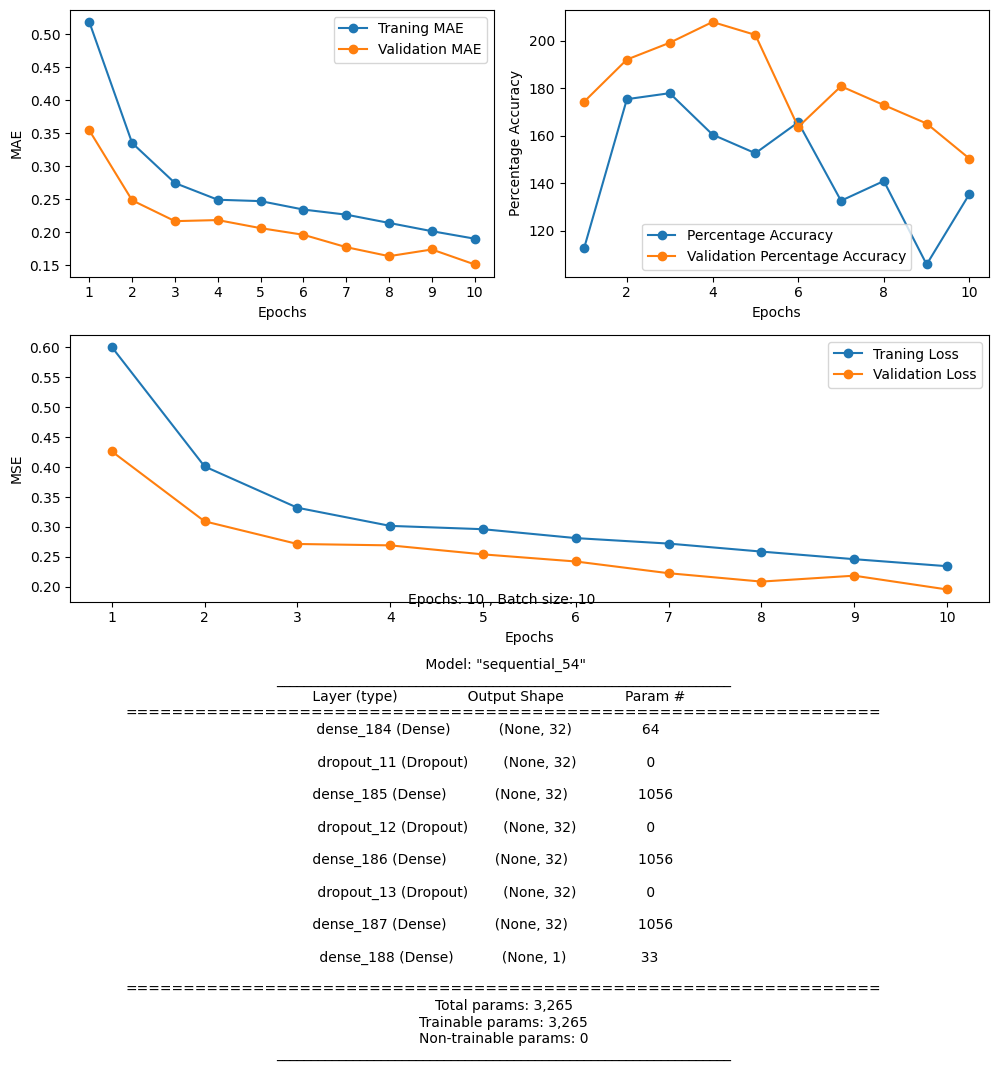

In [256]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001), input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Increasing traning time (epochs)

- It seems that this not help learning, we need a bigger network

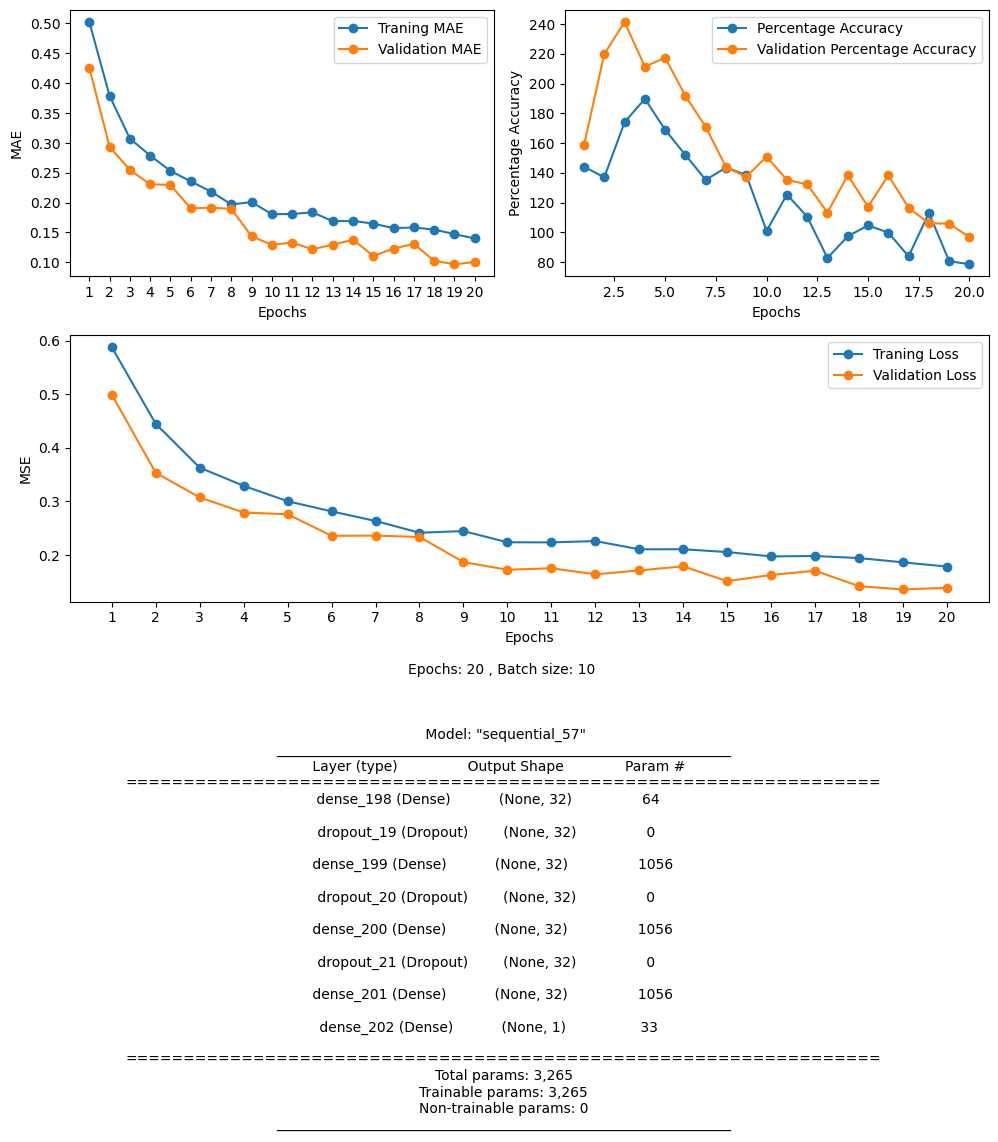

In [265]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001), input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 20
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Lessons learned

- No need for regularization, no real overfitting in this problem
- After 25 epoch we don't see improvement
- A network of 2 x 128 is enough

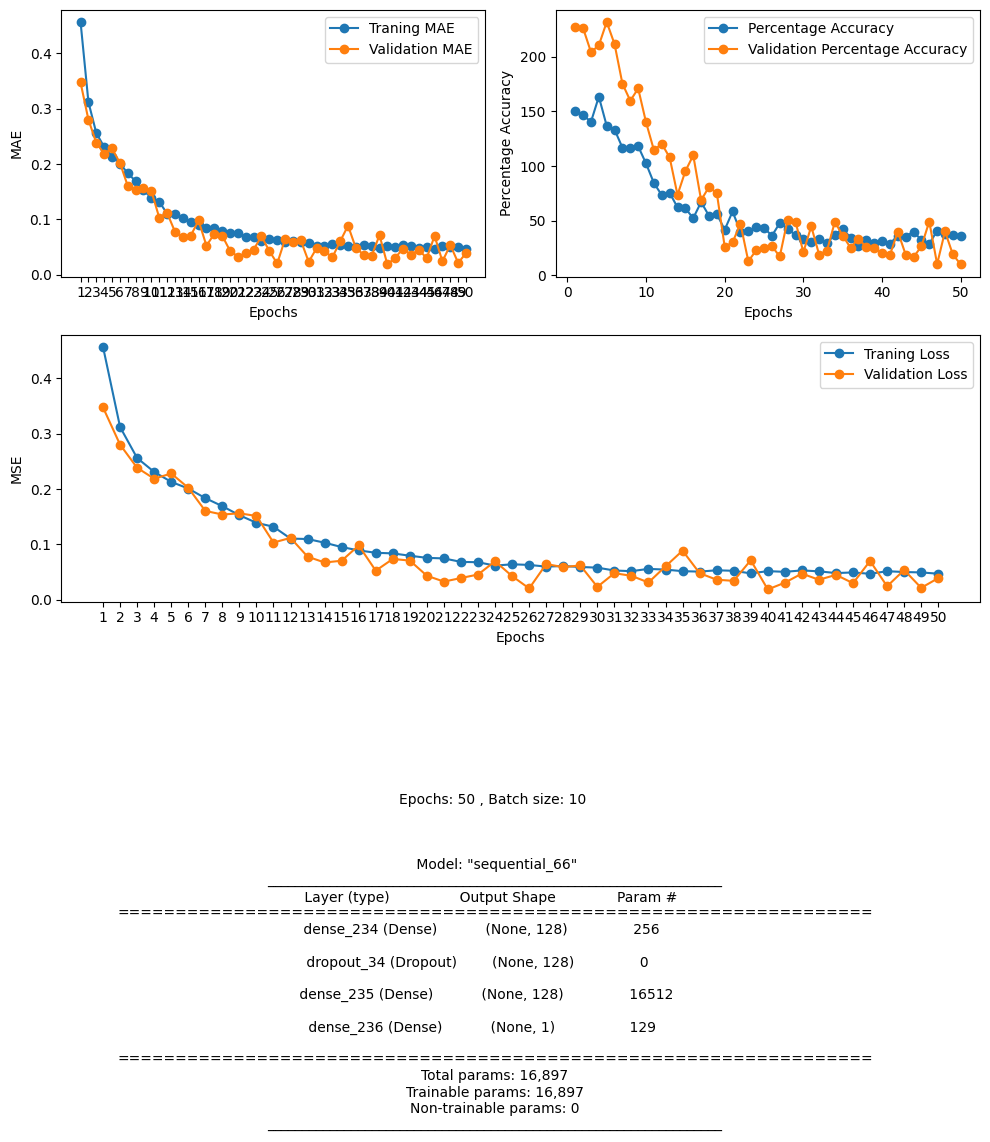

In [286]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 50
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### Doing the final learning with train and validation dataset

In [297]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 25
batch_size = 10

history = model.fit(np.concatenate((X_train, X_val) , axis=0), np.concatenate((Y_train, Y_val) , axis=0),
                    epochs=epoch, batch_size=batch_size, verbose=0)


## Evaulating the performance of the model

In [298]:
model.evaluate(test_data[:,0], test_data[:,1])

4/4 [==============================] - 0s 8ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - percentage_metric: 34.0123


[0.03129122406244278, 0.03129122406244278, 34.0123176574707]

4/4 [==============================] - 0s 2ms/step


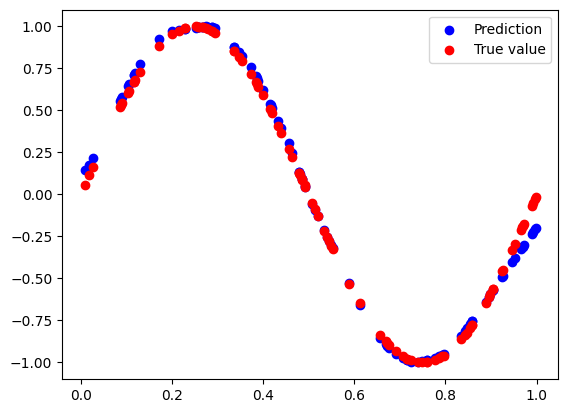

In [299]:
predictions = model.predict(test_data[:,0])
true_values = test_data[:,1]

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x = test_data[:,0], y = predictions, c='b',  label='Prediction')
ax1.scatter(x = test_data[:,0] , y = true_values,  c='r',  label='True value')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


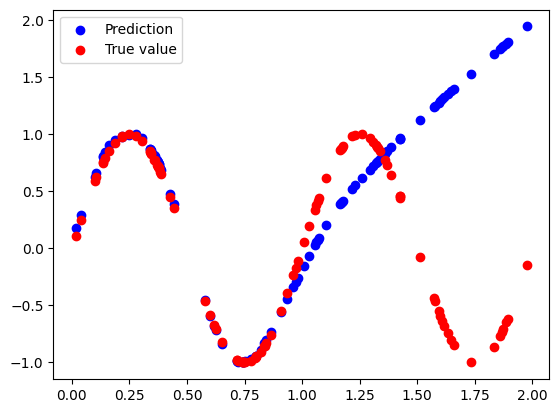

In [300]:
from random import random

lenght = 2

new_inputs = [(random() * lenght ) for i in range(100)]

predictions = model.predict(new_inputs)
true_values = [(np.sin(input * 2 * np.pi)) for input in new_inputs]


fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x = new_inputs, y = predictions, c='b',  label='Prediction')
ax1.scatter(x = new_inputs , y = true_values,  c='r',  label='True value')
plt.legend()
plt.show()